In [31]:
import numpy as np
import matplotlib.pyplot as plt
import csv

#single step bulk and bound return the coefficient by which to multiply dx for change in x and l in simulation (return +/- 1 or 0)
def single_step_bulk(delt,lam,bet):
  #print(delt,lam,bet)
  choose = np.random.choice([-1,0,1],p=[delt/(delt+lam+bet),bet/(delt+lam+bet),lam/(delt+lam+bet)])
  xDisp = choose
  lDisp = abs(choose) - 1
  rDisp = -1 * lDisp
  return xDisp, lDisp, rDisp

def single_step_bound(gam,lam,bet):
  choose = np.random.choice([-1,0,1], p=[gam/(gam+lam+bet),bet/(gam+lam+bet),lam/(gam+lam+bet)])
  xDisp = choose
  lDisp = 0
  if(choose == 0):
    lDisp = -1
    xDisp = 0
  elif(choose == -1):
    lDisp = 1
    xDisp = 0
  else:
    lDisp = 0
    xDisp = 1
  rDisp = -1 * lDisp
  return xDisp, lDisp, rDisp

#combine for a single trial
def single_trial(x0,dx,R,b,delt,lam,bet,gam,epsilon,rMax=100,l0=0,output=False):
  currX = x0
  currL = l0
  currR = R - currL

  currDelta = delt(currX,currL,currR,dx,epsilon)
  currLambda = lam(currX,currL,currR,dx,epsilon)
  currBeta = bet(currX,currL,currR,dx,epsilon)
  currGamma = gam(currX,currL,currR,dx,epsilon)

  reachedR = -1

  # if(currR <= 0):
  #   reachedR = 1
  #   print("R is already reached")
  #   return reachedR

  while_counter = 0
  while(currR < rMax and (currL < R or currX > 0)):
    while_counter += 1
    #reevaluating rates based on whatever functions they are (defined I'm assuming in terms of some combination of x, l, and r)
    currDelta = delt(currX,currL,currR,dx,epsilon)
    currLambda = lam(currX,currL,currR,dx,epsilon)
    currBeta = bet(currX,currL,currR,dx,epsilon)
    currGamma = gam(currX,currL,currR,dx,epsilon)
    #taking a step!
    if(currX > 0):
      xDisp,lDisp,rDisp = single_step_bulk(currDelta,currLambda,currBeta)
      currX += xDisp * dx
      currL += lDisp * dx
      currR = R - currL
      currX = round(currX,4)
      currL = round(currL,4)
      currR = round(currR,4)
    elif(currX <= 0):
      currX = 0
      currGamma = gam(currX,currL,currR,dx,epsilon)
      currLambda = lam(currX,currL,currR,dx,epsilon)
      currBeta = bet(currX,currL,currR,dx,epsilon)
      xDisp,lDisp,rDisp = single_step_bound(currGamma,currLambda,currBeta)
      currX += xDisp * dx
      currL += lDisp * dx
      currR = R - currL
      currX = round(currX,4)
      currL = round(currL,4)
      currR = round(currR,4)
    else:
      if(output):
        print("edge case: exiting after " + str(while_counter) + " iterations")
    # if(output):
    #   print("currR = " + str(currR))
    #   print("currX = " + str(currX))

  if(output):
    print("success! exiting after " + str(while_counter) + " iterations")

  if(currR >= rMax):
    reachedR = 0
    print("max R is reached: " + str(rMax))
  elif(currL >= R or currR <= 0):
    reachedR = 1
    print("R is reached (resource depleted)")
#   elif(while_counter >= 2000000):
#     reachedR = 0
#     print("max iterations reached")

  return reachedR


def single_trial_graph(x0,dx,R,b,delt,lam,bet,gam,epsilon,rMax = 100,l0=0,output=False):

  rList = []
  xList = []


  currX = x0
  currL = l0
  currR = R - currL

  currDelta = delt(currX,currL,currR,dx,epsilon)
  currLambda = lam(currX,currL,currR,dx,epsilon)
  currBeta = bet(currX,currL,currR,dx,epsilon)
  currGamma = gam(currX,currL,currR,dx,epsilon)

  reachedR = -1

  # if(currR <= 0):
  #   reachedR = 1
  #   print("R is already reached")
  #   return reachedR

  while_counter = 0
  while(currR < rMax and (currL < R or currX > 0)):
    rList.append(currR)
    xList.append(currX)
    while_counter += 1
    #reevaluating rates based on whatever functions they are (defined I'm assuming in terms of some combination of x, l, and r)
    currDelta = delt(currX,currL,currR,dx,epsilon)
    currLambda = lam(currX,currL,currR,dx,epsilon)
    currBeta = bet(currX,currL,currR,dx,epsilon)
    currGamma = gam(currX,currL,currR,dx,epsilon)
    #taking a step!
    if(currX > 0):
      xDisp,lDisp,rDisp = single_step_bulk(currDelta,currLambda,currBeta)
      currX += xDisp * dx
      currL += lDisp * dx
      currR = R - currL
      currX = round(currX,4)
      currL = round(currL,4)
      currR = round(currR,4)
    elif(currX <= 0):
      currX = 0
      currGamma = gam(currX,currL,currR,dx,epsilon)
      currLambda = lam(currX,currL,currR,dx,epsilon)
      currBeta = bet(currX,currL,currR,dx,epsilon)
      xDisp,lDisp,rDisp = single_step_bound(currGamma,currLambda,currBeta)
      currX += xDisp * dx
      currL += lDisp * dx
      currR = R - currL
      currX = round(currX,4)
      currL = round(currL,4)
      currR = round(currR,4)
    else:
      if(output):
        print("edge case: exiting after " + str(while_counter) + " iterations")
    # if(output):
    #   print("currR = " + str(currR))

  if(output):
    print("success! exiting after " + str(while_counter) + " iterations")

  rList.append(currR)
  xList.append(currX)

  if(currR >= rMax):
    reachedR = 0
    print("max R is reached: " + str(rMax))
  elif(currL >= R or currR <= 0):
    reachedR = 1
    print("R is reached (resource depleted)")
#   elif(while_counter >= 2000000):
#     reachedR = 0
#     print("max iterations reached")

  return rList, xList, reachedR

#monte carlo
def get_prob_number(num_trials,x0,dx,R,b,delt,lam,bet,gam,epsilon,rMaxx=100,l00=0,outputt=False):
  total = 0
  for i in range(num_trials):
    total += single_trial(x0,dx,R,b,delt,lam,bet,gam,epsilon,rMax=rMaxx,l0=l00,output=outputt)
  return total/float(num_trials)

# alphas

In [24]:
#trying beta = gamma = 1/(ln(r+1))
num_trials = 25
BIGR = 2
trialX = np.linspace(0.1,2,5)
trialR = np.linspace(0.1,2,5) # making the dimensions for my own orientation purposes
alph = 1.5
epsilon = 1

X, R = np.meshgrid(trialX, trialR)
PROBS = np.empty((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return r

def deltaa(x,l,r,dx,epsilon):
  return r

def gammaa(x,l,r,dx,epsilon):
  return r**alph

def betaa(x,l,r,dx,epsilon):
  return dx*r

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,rMaxx=2000,l00 = BIGR-trialR[r],outputt=False)

with open('/Users/Greencat/sustainability-simulations/diff_alphas/onepointfive_maxR2000.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.1  x: 0.1
R is reached (resource depleted)
max R is reached: 2000
max R is reached: 2000
R is reached (resource depleted)
R is reached (resource depleted)
R is reached (resource depleted)
R is reached (resource depleted)
max R is reached: 2000
max R is reached: 2000
R is reached (resource depleted)
max R is reached: 2000
R is reached (resource depleted)
R is reached (resource depleted)
R is reached (resource depleted)
R is reached (resource depleted)
R is reached (resource depleted)
R is reached (resource depleted)
R is reached (resource depleted)
max R is reached: 2000
R is reached (resource depleted)
R is reached (resource depleted)
max R is reached: 2000
max R is reached: 2000
R is reached (resource depleted)
R is reached (resource depleted)
r: 0.1  x: 0.575
max R is reached: 2000
R is reached (resource depleted)
R is reached (resource depleted)
max R is reached: 2000
max R is reached: 2000
max R is reached: 2000
max R is reached: 2000
max R is reached: 2000
max R is reached: 2

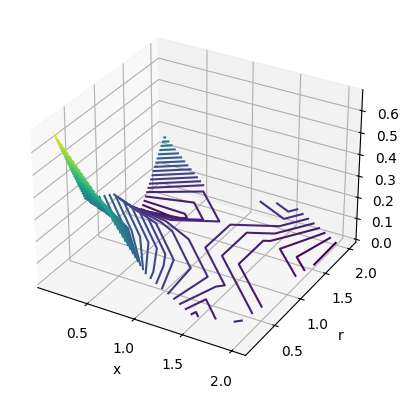

3.8913578936133106
0.15565431574453242


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

TX, TR = np.meshgrid(trialX, trialR)

def P(x,r):
    return np.exp(-1)*np.exp(-(r+1)*(np.log(r+1)-1)) * np.exp(-x)

errs = []

x = np.linspace(0.1, 2, 100)
r = np.linspace(0.1, 2, 200)

X, R = np.meshgrid(x, r)
Z = np.empty((200,100))
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = P(x[j],r[i])

    
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(X, R, Z, 50, cmap=cm.hsv)
ax.contour3D(TX,TR,PROBS,50,cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('r')
ax.set_zlabel('Pi')
#ax.set_title('L(l,x) 2D case, a = 5, b = 20, r = 5')
plt.show()
    
errorSum = 0
for i in range(len(trialR)):
    for j in range(len(trialX)):
        errorSum += abs(PROBS[i][j] - P(trialX[j],trialR[i]))
print(errorSum)
print(errorSum/(len(trialR)*len(trialX)))
#look at max error
#plot abs val of difference

In [32]:
#trying beta = gamma = 1/(ln(r+1))
num_trials = 50
BIGR = 2
trialX = np.linspace(0.1,2,5)
trialR = np.linspace(0.1,2,5) # making the dimensions for my own orientation purposes
alph = 1.5
alphs = [.1*i for i in range(1,36)]
PROBS = np.empty(np.array(alphs).shape)
epsilon = 1

# X, R = np.meshgrid(trialX, trialR)
# PROBS = np.empty((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return r

def deltaa(x,l,r,dx,epsilon):
  return r

def gammaa(x,l,r,dx,epsilon):
  return r**alph

def betaa(x,l,r,dx,epsilon):
  return dx*r

# for r in range(len(PROBS)):
#   for x in range(len(PROBS[r])):
#     print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
#     PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,rMaxx=2000,l00 = BIGR-trialR[r],outputt=False)
for a in range(len(alphs)):
  def gammaa(x,l,r,dx,epsilon):
    return r**alphs[a]
  print("alpha: " + str(alphs[a]))
  PROBS[a] = get_prob_number(num_trials,1,.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,rMaxx=2000,l00 = BIGR-1,outputt=True)

with open('/Users/Greencat/sustainability-simulations/diff_alphas/diffAlphsStarting11_maxR2000_trial2.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows([PROBS])

alpha: 0.1
success! exiting after 420045 iterations
max R is reached: 2000
success! exiting after 423884 iterations
max R is reached: 2000
success! exiting after 426186 iterations
max R is reached: 2000
success! exiting after 419764 iterations
max R is reached: 2000
success! exiting after 427231 iterations
max R is reached: 2000
success! exiting after 419943 iterations
max R is reached: 2000
success! exiting after 417871 iterations
max R is reached: 2000
success! exiting after 417505 iterations
max R is reached: 2000
success! exiting after 416701 iterations
max R is reached: 2000
success! exiting after 116 iterations
R is reached (resource depleted)
success! exiting after 413967 iterations
max R is reached: 2000
success! exiting after 128 iterations
R is reached (resource depleted)
success! exiting after 418968 iterations
max R is reached: 2000
success! exiting after 417973 iterations
max R is reached: 2000
success! exiting after 38 iterations
R is reached (resource depleted)
success! 

Text(0.5, 1.0, 'starting at (x,r) = (1,1)')

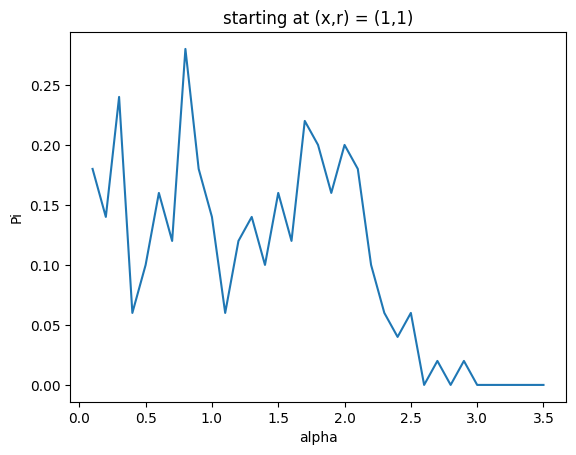

In [33]:
plt.plot(alphs,PROBS)
plt.xlabel('alpha')
plt.ylabel('Pi')
plt.title('starting at (x,r) = (1,1)')